# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,workday,weekend
1,2020-04-18,1,68,weekend,workday
2,2020-04-19,18,15,weekend,workday
3,2020-04-20,2,23,workday,workday
4,2020-04-21,0,25,workday,workday


In [3]:
X = df[['am', 'pm']].values
Y = df['target'].values
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X,Y)

w1, w2 = model.coef_[0]

x_values = np.linspace(df['am'].min(), df['am'].max(), 100) 
y_values = -(w1/w2) * x_values

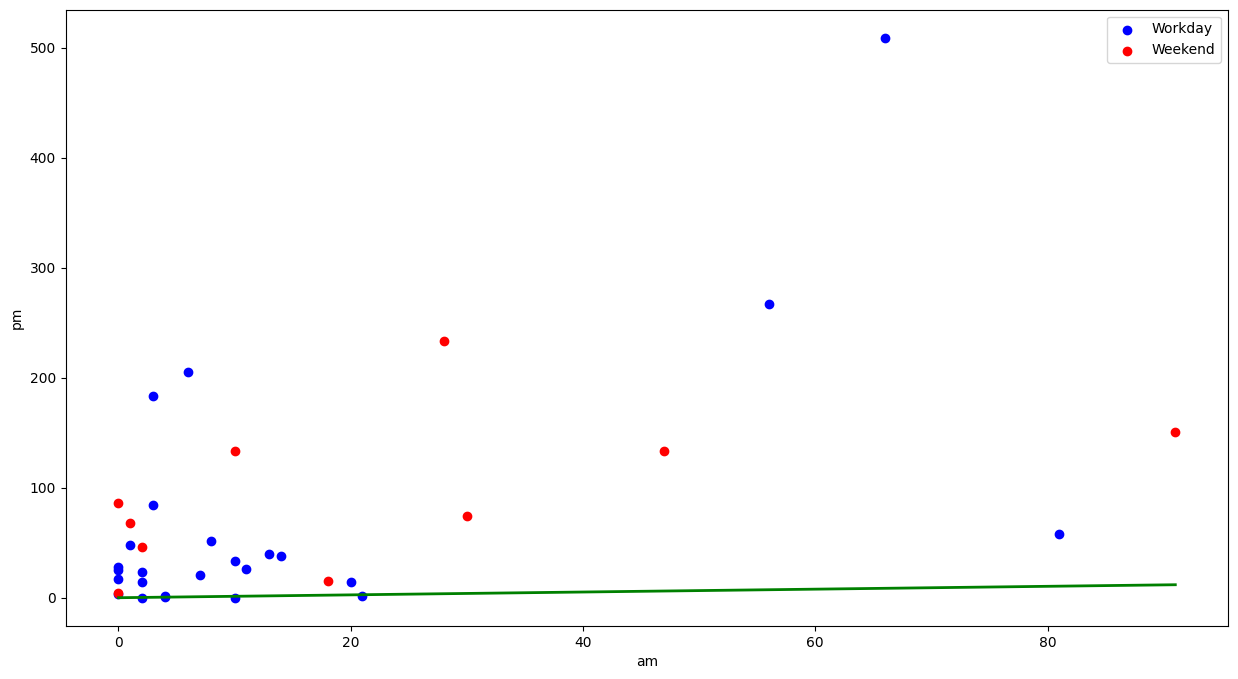

In [4]:
plt.figure(figsize=(15,8))

workdays_df = df[df['target'] == 'workday']
plt.scatter(workdays_df['am'], workdays_df['pm'], label='Workday', color='blue')

weekends_df = df[df['target'] == 'weekend']
plt.scatter(weekends_df['am'], weekends_df['pm'], label='Weekend', color='red')

plt.plot(x_values, y_values, color='green', linewidth=2)

plt.xlabel('am')
plt.ylabel('pm')
plt.legend()

plt.show()

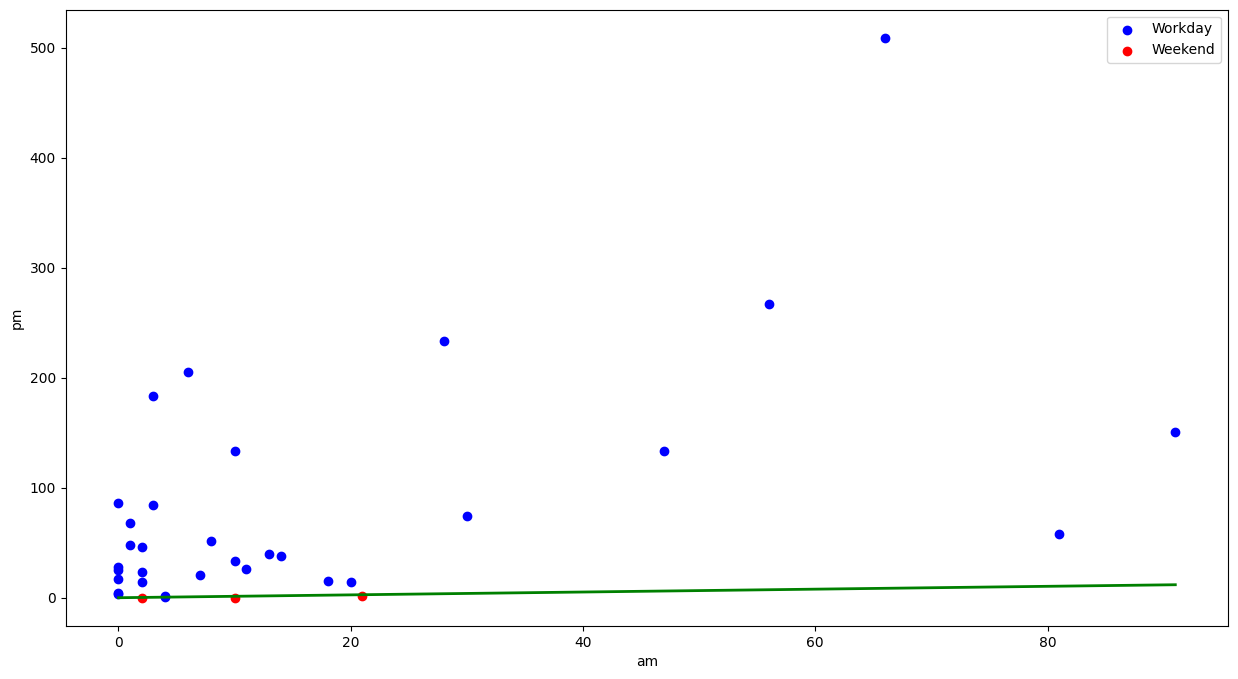

In [5]:
plt.figure(figsize=(15,8))

workdays_df = df[df['predict'] == 'workday']
plt.scatter(workdays_df['am'], workdays_df['pm'], label='Workday', color='blue')

weekends_df = df[df['predict'] == 'weekend']
plt.scatter(weekends_df['am'], weekends_df['pm'], label='Weekend', color='red')

plt.plot(x_values, y_values, color='green', linewidth=2)

plt.xlabel('am')
plt.ylabel('pm')
plt.legend()

plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(X_scaled,Y)

df['predict after scaling'] = model_scaled.predict(X_scaled)
accuracy = accuracy_score(y_true=df['target'], y_pred=df['predict after scaling'])
accuracy

0.7428571428571429

In [8]:
most_common_class = df['target'].value_counts().idxmax()
naive_predict = [most_common_class] * len(Y)
naive_accuracy = accuracy_score(df['target'], naive_predict)
naive_accuracy

0.7142857142857143

In [9]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X_scaled,Y)

w1, w2 = model.coef_[0]

x_vals_original = np.linspace(df['am'].min(), df['am'].max(), 100)
x_vals_scaled = (x_vals_original - scaler.mean_[0]) / scaler.scale_[0]
y_vals_scaled = -(w1 * x_vals_scaled) / w2
y_vals_original = y_vals_scaled * scaler.scale_[1] + scaler.mean_[1]

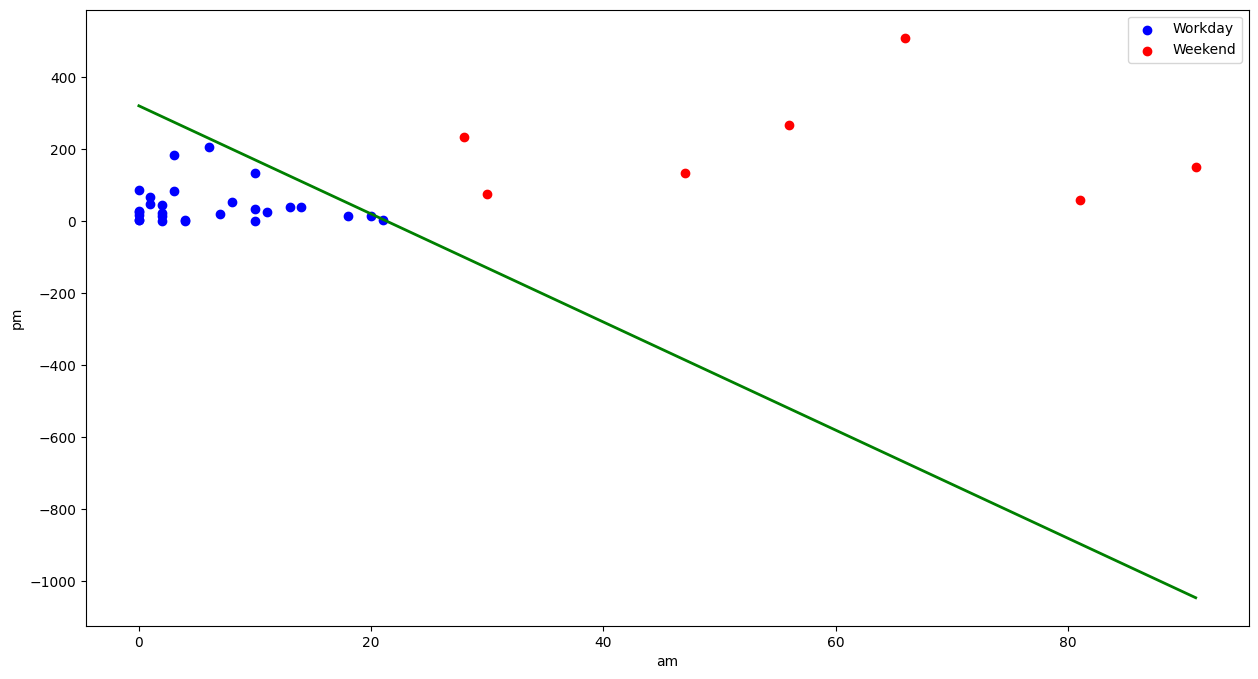

In [10]:
plt.figure(figsize=(15,8))

workdays_df = df[df['predict after scaling'] == 'workday']
plt.scatter(workdays_df['am'], workdays_df['pm'], label='Workday', color='blue')

weekends_df = df[df['predict after scaling'] == 'weekend']
plt.scatter(weekends_df['am'], weekends_df['pm'], label='Weekend', color='red')

plt.plot(x_vals_original, y_vals_original, color='green', linewidth=2)

plt.xlabel('am')
plt.ylabel('pm')
plt.legend()

plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [11]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

best_accuracy = 0
best_kernel = None
best_model = None

for kernel_element in kernel_list:
    model_svc = SVC(probability=True, random_state=21,kernel=kernel_element)
    model_svc.fit(X_scaled,Y)
    y_pred = model_svc.predict(X_scaled)
    accuracy = accuracy_score(Y, y_pred)
    print(f'{kernel_element} accuracy: {accuracy:.4f}')
    
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_model = model_svc
        best_kernel = kernel_element

print(f'Best model: {best_kernel} with accuracy {best_accuracy}')

linear accuracy: 0.7143
poly accuracy: 0.7429
rbf accuracy: 0.7429
sigmoid accuracy: 0.6857
Best model: rbf with accuracy 0.7428571428571429


In [12]:
df['SVM predict'] = best_model.predict(X_scaled)
df

,date,am,pm,target,predict,predict after scaling,SVM predict
0,2020-04-17,21,2,workday,weekend,workday,workday
1,2020-04-18,1,68,weekend,workday,workday,workday
2,2020-04-19,18,15,weekend,workday,workday,workday
3,2020-04-20,2,23,workday,workday,workday,workday
4,2020-04-21,0,25,workday,workday,workday,workday
5,2020-04-22,0,28,workday,workday,workday,workday
6,2020-04-23,10,33,workday,workday,workday,workday
7,2020-04-24,2,14,workday,workday,workday,workday
8,2020-04-25,30,74,weekend,workday,weekend,workday
9,2020-04-26,28,233,weekend,workday,weekend,workday


In [13]:
final_accuracy = accuracy_score(Y, df['SVM predict'])
final_accuracy

0.7428571428571429

In [14]:
X

array([[ 21,   2],
       [  1,  68],
       [ 18,  15],
       [  2,  23],
       [  0,  25],
       [  0,  28],
       [ 10,  33],
       [  2,  14],
       [ 30,  74],
       [ 28, 233],
       [  4,   2],
       [  4,   1],
       [  0,  17],
       [ 13,  40],
       [  8,  52],
       [ 91, 151],
       [ 47, 133],
       [ 11,  26],
       [ 81,  58],
       [  2,   0],
       [ 14,  38],
       [  3,  84],
       [  0,  86],
       [ 10, 133],
       [  3, 183],
       [ 56, 267],
       [  6, 205],
       [ 66, 509],
       [ 10,   0],
       [  0,   4],
       [  2,  46],
       [  0,   3],
       [ 20,  14],
       [  7,  21],
       [  1,  48]])

In [15]:
X_scaled

array([[ 0.20069005, -0.71990365],
       [-0.65591383, -0.07182203],
       [ 0.07219947, -0.59225121],
       [-0.61308363, -0.51369586],
       [-0.69874402, -0.49405703],
       [-0.69874402, -0.46459877],
       [-0.27044208, -0.41550168],
       [-0.61308363, -0.60207063],
       [ 0.5861618 , -0.01290552],
       [ 0.50050141,  1.54838202],
       [-0.52742324, -0.71990365],
       [-0.52742324, -0.72972307],
       [-0.69874402, -0.57261237],
       [-0.1419515 , -0.34676575],
       [-0.35610247, -0.22893273],
       [ 3.19880362,  0.7431897 ],
       [ 1.31427509,  0.56644017],
       [-0.22761189, -0.48423761],
       [ 2.77050168, -0.17001622],
       [-0.61308363, -0.73954249],
       [-0.09912131, -0.36640459],
       [-0.57025344,  0.08528866],
       [-0.69874402,  0.1049275 ],
       [-0.27044208,  0.56644017],
       [-0.57025344,  1.05741109],
       [ 1.69974683,  1.88224224],
       [-0.44176286,  1.2734383 ],
       [ 2.12804877,  4.25854152],
       [-0.27044208,

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


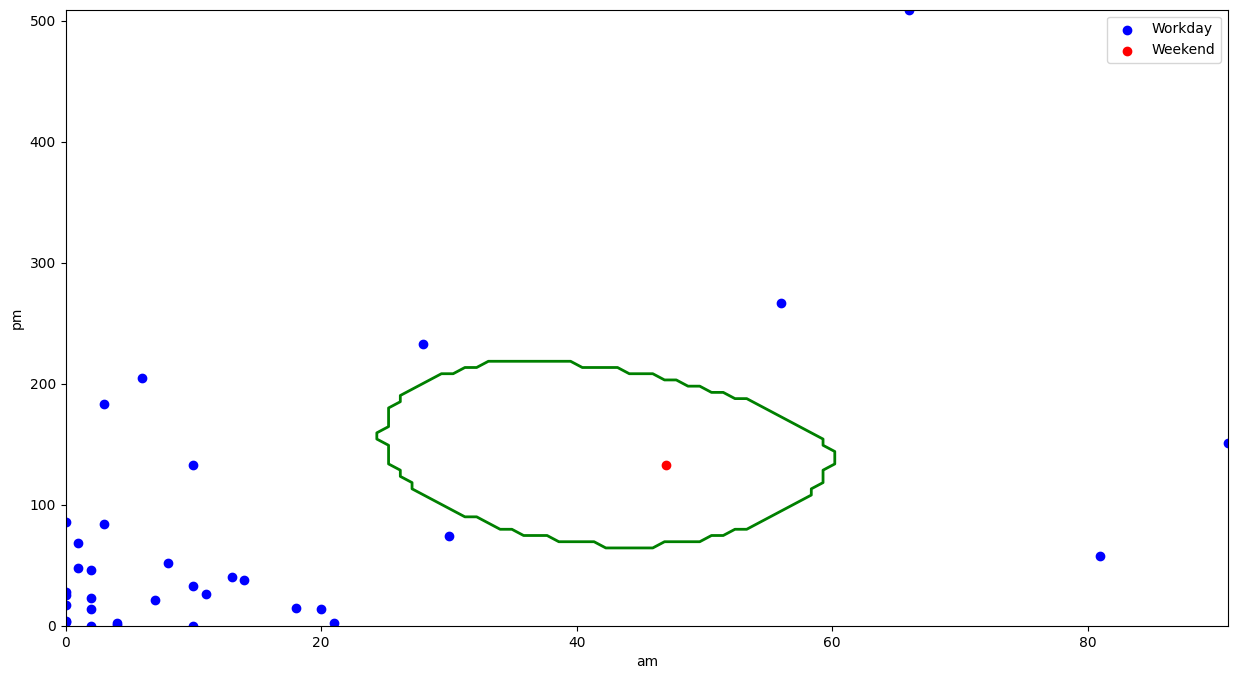

In [16]:
plt.figure(figsize=(15,8))

workdays_df = df[df['SVM predict'] == 'workday']
plt.scatter(workdays_df['am'], workdays_df['pm'], label='Workday', color='blue')

weekends_df = df[df['SVM predict'] == 'weekend']
plt.scatter(weekends_df['am'], weekends_df['pm'], label='Weekend', color='red')

if best_model.kernel == 'linear':
    w1, w2 = best_model.coef_[0]
    x_vals = np.linspace(df['am'].min(), df['am'].max(), 100)
    y_vals = -(w1 * x_vals) / w2
    plt.plot(x_vals, y_vals, 'g-', linewidth=2, label="Decision Boundary")
else:
    xx, yy = np.meshgrid(
        np.linspace(df['am'].min(), df['am'].max(), 100),
        np.linspace(df['pm'].min(), df['pm'].max(), 100)
    )
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm'])
    
    mesh_points_scaled = scaler.transform(mesh_points)
    Z = best_model.predict(mesh_points_scaled)

    Z_numeric = np.where(Z == 'weekend', 1, 0).reshape(xx.shape)
    
    plt.contour(xx, yy, Z_numeric, colors='green', linewidths=2, levels=[0.5])



plt.xlabel('am')
plt.ylabel('pm')
plt.legend()

plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [17]:
le = LabelEncoder()
df['target encoded'] = le.fit_transform(df['target'])

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X, df['target encoded'])

df['Tree predict'] = model.predict(X)
accuracy = accuracy_score(df['target encoded'], df['Tree predict'])
accuracy

0.9428571428571428

In [18]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(mesh_points).reshape(xx.shape)

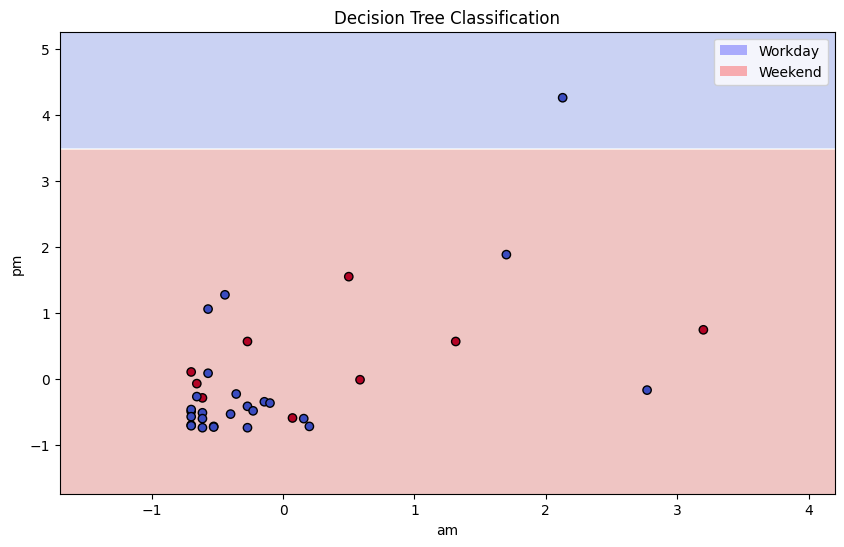

In [19]:
from matplotlib.patches import Patch
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=np.where(Y == 'weekend', 1, 0), 
            cmap='coolwarm', edgecolor='k', label=Y)

legend_elements = [Patch(facecolor='blue', alpha=0.3, label='Workday'),
                   Patch(facecolor='red', alpha=0.3, label='Weekend')]

plt.legend(handles=legend_elements, loc='upper right')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Decision Tree Classification')
plt.show()

[Text(0.40625, 0.9, 'y <= 63.0\ngini = 0.408\nsamples = 35\nvalue = [10, 25]\nclass = workday'),
 Text(0.125, 0.7, 'y <= 3.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = workday'),
 Text(0.265625, 0.8, 'True  '),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = workday'),
 Text(0.1875, 0.5, 'y <= 9.0\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = workday'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = weekend'),
 Text(0.25, 0.3, 'x <= 16.0\ngini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = workday'),
 Text(0.1875, 0.1, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = workday'),
 Text(0.3125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = workday'),
 Text(0.6875, 0.7, 'y <= 167.0\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = weekend'),
 Text(0.546875, 0.8, '  False'),
 Text(0.5625, 0.5, 'x <= 6.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = weekend'),
 Text(0.5, 0.3, 'x <= 2.0\ngini = 0.444\nsampl

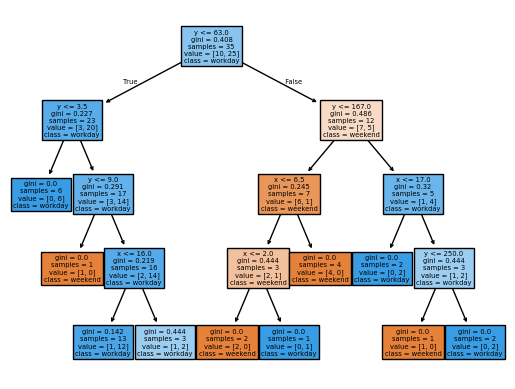

In [20]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=['x', 'y'], class_names=le.classes_, filled=True)

In [21]:
n_workday_leaves = sum(1 for i in range(model.tree_.node_count) 
                  if model.tree_.children_left[i] == -1  # Это лист
                  and np.argmax(model.tree_.value[i]) == 0)  # Класс workday (0)

print(f"Количество листьев с рабочими днями: {n_workday_leaves}")

Количество листьев с рабочими днями: 4
